# Introduction to Python - Session 3
1. Installing and using packages
2. Data wrangling:
    - The numpy package
    - The pandas package

SLIDES [HERE](https://docs.google.com/presentation/d/11vBUnU8YTIUY84iuW1UhCj0VYkPXEtmh-rdxV33yh_k/export/pdf)

## EXERCISE 1 - Introduction to NumPy

In [31]:
import numpy as np

**1. Create an array `a` of random numbers and shape (3,4).**

In [40]:
a = np.random.normal(size=(3,4))
a

array([[-0.51915848,  0.66748191, -1.00457491,  2.15547403],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746]])

**2. Add a fifth column to `a` with values 0, 0.5, and 1.**

In [45]:
a = np.column_stack([a,np.array([0,0.5,1])])
a

array([[-0.51915848,  0.66748191, -1.00457491,  2.15547403,  0.        ],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078,  0.5       ],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746,  1.        ]])

**3. Find all values that are greater or equal to 0.5.**

In [46]:
a[a >= 0.5]

array([[False,  True, False,  True, False],
       [False, False, False, False,  True],
       [False, False,  True, False,  True]])

**4. Replace all the first row with NAs.**

In [47]:
a[0,:] = np.nan
a

array([[        nan,         nan,         nan,         nan,         nan],
       [ 0.28215934, -1.23791706,  0.37058204, -0.52457078,  0.5       ],
       [-0.71350475, -0.31829367,  1.34558394,  0.07894746,  1.        ]])

**5. Use matrix multiplication against the vector `b = np.array([1, 0, 10])`.**

In [50]:
b = np.array([1,0,10]).reshape(-1,1)
a.T.dot(b)

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]])

**6. Element-wise multiplication of the same vectors `a` and `b`.** Note that `b` is broadcasted along all rows.

In [51]:
a * b

array([[        nan,         nan,         nan,         nan,         nan],
       [ 0.        , -0.        ,  0.        , -0.        ,  0.        ],
       [-7.13504754, -3.18293673, 13.45583943,  0.78947455, 10.        ]])

**7. Calculate the sum, the mean, and the median of each row of `a`. Use the so-called numpy functions.**

In [58]:
np.sum(a, axis=1)

array([        nan, -0.60974646,  1.39273297])

In [59]:
np.mean(a, axis=1)

array([        nan, -0.12194929,  0.27854659])

In [60]:
np.median(a, axis=1)

array([       nan, 0.28215934, 0.07894746])

## EXERCISE 2 - Introduction to Pandas

In [2]:
import pandas as pd

**1. Create the following DataFrame `mydf`, with index `John, Jessica, Steve, Rachel` and columns `Age, Height, Sex`.**

```
43 	181 	M
34 	172 	F
22 	189 	M
27 	167 	F
```

In [2]:
mydf = pd.DataFrame({
    "Age": [43, 34, 22, 27],
    "Height": [181, 172, 189, 167],
    "Sex": ["M", "F", "M", "F"]
}, index=["John","Jessica","Steve","Rachel"])
mydf

,Age,Height,Sex
John,43,181,M
Jessica,34,172,F
Steve,22,189,M
Rachel,27,167,F


**2. What is the shape of `mydf`?**

In [3]:
mydf.shape

(4, 3)

**3. Calculate the average age and height in `mydf`.**

In [4]:
mydf[["Height","Age"]].mean()

Height    177.25
Age        31.50
dtype: float64

**4. Add one row to `mydf`: Georges who is 53 years old, 168cm tall, and Male.**

In [5]:
mydf.loc["Georges"] = [53, 168, "M"]
mydf

,Age,Height,Sex
John,43,181,M
Jessica,34,172,F
Steve,22,189,M
Rachel,27,167,F
Georges,53,168,M


**5. Change the row names of `mydf` so that the data becomes anonymous.** Use Patient1, Patient2, etc. instead of actual names.

In [12]:
mydf = mydf.reset_index(drop=True)
mydf.index = ['Patient'+str(i) for i in mydf.index]

In [17]:
mydf

,Age,Height,Sex
Patient0,43,181,M
Patient1,34,172,F
Patient2,22,189,M
Patient3,27,167,F
Patient4,53,168,M


**6. Create the DataFrame `mydf2` that is a subset of `mydf` containing only the female entries.**

In [18]:
mydf2 = mydf.loc[mydf["Sex"]=="F"]
mydf2

,Age,Height,Sex
Patient1,34,172,F
Patient3,27,167,F


**7. Import the data in `more_patients.tsv` in a DataFrame named `moredf`.**

In [21]:
moredf = pd.read_table("data/more_patients.tsv", index_col=0)
moredf

,Age,Height,Sex
Patient6,18,175,M
Patient7,60,170,F
Patient8,36,169,F


**8. Create a DataFrame `mydf3` by concatenating `mydf` and `moredf`.**

In [22]:
mydf3 = pd.concat([mydf,moredf])
mydf3

,Age,Height,Sex
Patient0,43,181,M
Patient1,34,172,F
Patient2,22,189,M
Patient3,27,167,F
Patient4,53,168,M
Patient6,18,175,M
Patient7,60,170,F
Patient8,36,169,F


**9. Calculate the number of male and female patients combining the `.groupby` and `.size` methods in `mydf3`.**

In [24]:
mydf3.groupby("Sex").size()

Sex
F    4
M    4
dtype: int64

**10. Calculate the average age and height by sex combining the `.groupby` and `.mean` methods in `mydf3`.**

In [23]:
mydf3.groupby("Sex").mean()

,Age,Height
Sex,,
F,39.25,169.50
M,34.00,178.25


**11. Calculate the average age and height by sex using the `.groupby` and `.apply` methods in `mydf3`.**

In [26]:
mydf3.groupby("Sex")[["Age","Height"]].apply(lambda x: x.mean())

,Age,Height
Sex,,
F,39.25,169.50
M,34.00,178.25


**13. Standardize age and height by sex combining the `groupby` and `apply` methods in `mydf3`.**

In [30]:
mydf3.groupby("Sex")[["Age","Height"]].apply(lambda x: (x - x.mean()) / x.std())

,Age,Height
Patient0,0.537214,0.308263
Patient1,-0.365563,1.200961
Patient2,-0.716285,1.205029
Patient3,-0.852981,-1.200961
Patient4,1.134118,-1.148981
Patient6,-0.955047,-0.364311
Patient7,1.444845,0.240192
Patient8,-0.226301,-0.240192


## EXERCISE 3 - Analyzing COVID-19 data

Adapted from: https://www.w3resource.com/python-exercises/project/covid-19/index.php

Data Source: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

**File naming convention**

MM-DD-YYYY.csv in UTC.

**Field description**

- Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
- Country/Region: country/region name conforming to WHO (will be updated).
- Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
- Confirmed: the number of confirmed cases.
- Deaths: the number of deaths.
- Recovered: the number of recovered cases.

**Upload the latest update of the dataset.**

In [3]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-20-2022.csv')

**1. Write a Python program to display first 5 rows from COVID-19 dataset. Also print the dataset information (`info()`) and check the missing values (`isna()`).**

In [4]:
covid_data.head(n=5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-04-21 04:20:46,33.93911,67.709953,178574,7680,NaN,NaN,Afghanistan,458.724917,4.300738
1,NaN,NaN,NaN,Albania,2022-04-21 04:20:46,41.15330,20.168300,274606,3496,NaN,NaN,Albania,9542.219751,1.273097
2,NaN,NaN,NaN,Algeria,2022-04-21 04:20:46,28.03390,1.659600,265746,6874,NaN,NaN,Algeria,606.019793,2.586681
3,NaN,NaN,NaN,Andorra,2022-04-21 04:20:46,42.50630,1.521800,41013,153,NaN,NaN,Andorra,53080.955154,0.373052
4,NaN,NaN,NaN,Angola,2022-04-21 04:20:46,-11.20270,17.873900,99287,1900,NaN,NaN,Angola,302.093928,1.913644


In [5]:
print("Dataset information:")
print(covid_data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4010 non-null   object 
 4   Last_Update          4010 non-null   object 
 5   Lat                  3920 non-null   float64
 6   Long_                3920 non-null   float64
 7   Confirmed            4010 non-null   int64  
 8   Deaths               4010 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4010 non-null   object 
 12  Incident_Rate        3917 non-null   float64
 13  Case_Fatality_Ratio  3970 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.7+ KB
None


In [6]:
print("Missing data information:")
print(covid_data.isna().sum())

Missing data information:
FIPS                    742
Admin2                  738
Province_State          176
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              4010
Active                 4010
Combined_Key              0
Incident_Rate            93
Case_Fatality_Ratio      40
dtype: int64


**2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of COVID-19 country-wise.** HINT: You can use the `groupby` fucntion.

In [7]:
result = covid_data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
result

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,178574,7680,0.0,0.0
Albania,274606,3496,0.0,0.0
Algeria,265746,6874,0.0,0.0
Andorra,41013,153,0.0,0.0
Angola,99287,1900,0.0,0.0
...,...,...,...,...
West Bank and Gaza,656876,5657,0.0,0.0
Winter Olympics 2022,535,0,0.0,0.0
Yemen,11818,2148,0.0,0.0


**3. Write a Python program to get the Spanish `Province_State` cases of confirmed, deaths, recovered and active cases of COVID-19. Use `sort_values` to sort the values. Save the resulting dataframe as a csv file.**

In [12]:
c_data = covid_data.loc[covid_data.Country_Region=='Spain',:]
c_data = c_data.loc[:,['Province_State', 'Confirmed', 'Deaths', 'Recovered','Active']]
result = c_data.sort_values(by='Active', ascending=False)
result = result.set_index("Province_State", drop=True)
result
result.to_csv("Spain_COVID_cases.csv")

**4. Make a bar plot of the deaths of the previous DataFrame.** Pandas has some very simple plotting function for DataFrames included, which can often be very convenient. Here, you can use the `DataFrame.plot.bar()` function. For more compplicated plots, the package MatPlotLib is recommended.

<AxesSubplot:xlabel='Province_State'>

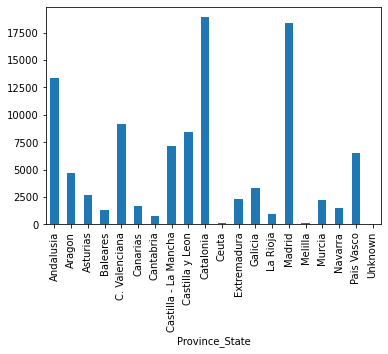

In [14]:
result["Deaths"].plot.bar()

**5. Make a scatter plot of confirmed cases againts deaths for all `Province_State` of the previous DataFrame.** Use the `DataFrame.plot.scatter()` function.

<AxesSubplot:xlabel='Confirmed', ylabel='Deaths'>

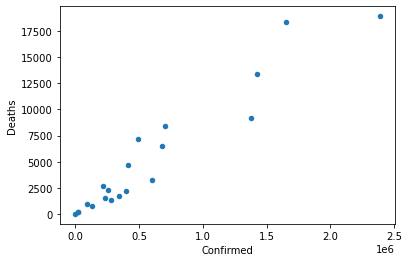

In [15]:
result.plot.scatter(x="Confirmed", y="Deaths")

## EXERCISE 4 - Gene annotation GFF3

[GFF is a standard file format](http://gmod.org/wiki/GFF3) for storing genomic features in a text file. GFF stands for Generic Feature Format. GFF files are plain text, 9 column, tab-delimited files.

The 9 columns of the annotation section are as follows:

- Column 1: "seqid" - The ID of the landmark used to establish the coordinate system for the current feature, a.k.a. chromosome name.
- Column 2: "source" - The algorithm or operating procedure that generated the feature.
- Column 3: "type" - The type of feature.
- Columns 4 & 5: "start" and "end" - The start and end of the feature.
- Column 6: "score" - The score of the feature, a floating point number.
- Column 7: "strand" - The strand of the feature.
- Column 8: "phase" - For features of type "CDS", the phase indicates where the feature begins with reference to the reading frame.
- Column 9: "attributes" - A list of feature attributes in the format tag=value.

**1. Load the data in "GRCh38.gff3", which contains a random subset of features of the human genome. Show the first 5 instances.**

In [6]:
human_data = pd.read_csv('data/GRCh38.gff3', sep='\t')
human_data.head()

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_000023.11,Gnomon,CDS,124061771,124061874,.,+,2,ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...
1,NC_000017.11,BestRefSeq,exon,5583687,5584512,.,-,.,ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...
2,NC_000003.12,BestRefSeq,exon,131685875,131685958,.,-,.,ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...
3,NC_000019.10,Gnomon,CDS,48221730,48221855,.,-,0,ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...
4,NC_000023.11,Curated Genomic,exon,124280435,124281622,.,+,.,ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...


**2. Which types of features are included in the dataset? How many of each? Make a barplot showing these numbers.**

['CDS' 'exon' 'gene' 'mRNA' 'lnc_RNA' 'transcript' 'cDNA_match'
 'pseudogene' 'enhancer' 'protein_binding_site' 'match'
 'biological_region' 'J_gene_segment'
 'non_allelic_homologous_recombination_region' 'primary_transcript'
 'recombination_region' 'snoRNA' 'miRNA' 'silencer' 'sequence_feature'
 'region' 'promoter' 'tandem_repeat' 'tRNA']


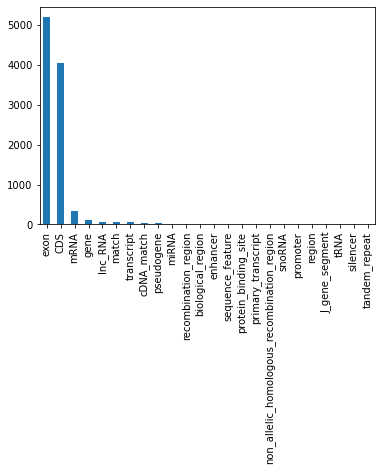

In [8]:
print(human_data.loc[:,"type"].unique())
human_data.loc[:,"type"].value_counts().plot.bar()

**3. Create a new column "len" that contains the length of each feature.**

In [11]:
# Remember that in sequences, start and end nucleotides are inclusive, but not in Python
human_data["len"] = human_data.end - human_data.start + 1
human_data

,seqid,source,type,start,end,score,strand,phase,attributes,len
0,NC_000023.11,Gnomon,CDS,124061771,124061874,.,+,2,ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...,104
1,NC_000017.11,BestRefSeq,exon,5583687,5584512,.,-,.,ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...,826
2,NC_000003.12,BestRefSeq,exon,131685875,131685958,.,-,.,ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...,84
3,NC_000019.10,Gnomon,CDS,48221730,48221855,.,-,0,ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...,126
4,NC_000023.11,Curated Genomic,exon,124280435,124281622,.,+,.,ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...,1188
...,...,...,...,...,...,...,...,...,...,...
9993,NC_000001.11,Gnomon,CDS,52481423,52481635,.,-,0,"ID=cds3944;Parent=rna5367;Dbxref=GeneID:23318,...",213
9994,NC_000003.12,Gnomon,exon,52138169,52138302,.,-,.,ID=id407700;Parent=rna31639;Dbxref=GeneID:2588...,134
9995,NC_000005.10,Gnomon,exon,177135087,177136030,.,+,.,ID=id636556;Parent=rna51086;Dbxref=GeneID:6432...,944
9996,NC_000002.12,Gnomon,CDS,127050802,127050912,.,-,0,"ID=cds15667;Parent=rna22237;Dbxref=GeneID:274,...",111


**6. Extract the gene name of all instances from the "attributes" column. Include it in a new column.** HINT: You can use `^` in the regular expression.

In [21]:
pattern = "(?<=gene=)[^;]+"
genes = [re.findall(pattern, l) for l in human_data.attributes]
human_data["gene"] = genes
human_data

,seqid,source,type,start,end,score,strand,phase,attributes,len,gene
0,NC_000023.11,Gnomon,CDS,124061771,124061874,.,+,2,ID=cds112493;Parent=rna159350;Dbxref=GeneID:10...,104,[STAG2]
1,NC_000017.11,BestRefSeq,exon,5583687,5584512,.,-,.,ID=id1513246;Parent=rna126322;Dbxref=GeneID:22...,826,[NLRP1]
2,NC_000003.12,BestRefSeq,exon,131685875,131685958,.,-,.,ID=id454056;Parent=rna34945;Dbxref=GeneID:1310...,84,[CPNE4]
3,NC_000019.10,Gnomon,CDS,48221730,48221855,.,-,0,ID=cds100981;Parent=rna143332;Dbxref=GeneID:22...,126,[CARD8]
4,NC_000023.11,Curated Genomic,exon,124280435,124281622,.,+,.,ID=id1865702;Parent=gene53119;Dbxref=GeneID:10...,1188,[NPM1P34]
...,...,...,...,...,...,...,...,...,...,...,...
9993,NC_000001.11,Gnomon,CDS,52481423,52481635,.,-,0,"ID=cds3944;Parent=rna5367;Dbxref=GeneID:23318,...",213,[ZCCHC11]
9994,NC_000003.12,Gnomon,exon,52138169,52138302,.,-,.,ID=id407700;Parent=rna31639;Dbxref=GeneID:2588...,134,[POC1A]
9995,NC_000005.10,Gnomon,exon,177135087,177136030,.,+,.,ID=id636556;Parent=rna51086;Dbxref=GeneID:6432...,944,[NSD1]
9996,NC_000002.12,Gnomon,CDS,127050802,127050912,.,-,0,"ID=cds15667;Parent=rna22237;Dbxref=GeneID:274,...",111,[BIN1]


**5. Microexons are defined as exons shorter or equal than 27 nucleotides. Find all microexons in the dataset.**

In [22]:
is_exon = (human_data.type=="exon")
is_micro = (human_data.len<=27)
microexons = human_data.loc[is_exon&is_micro,:]
microexons

,seqid,source,type,start,end,score,strand,phase,attributes,len,gene
130,NC_000012.12,Gnomon,exon,30753344,30753364,.,-,.,ID=id1189252;Parent=rna98739;Dbxref=GeneID:659...,21,[CAPRIN2]
481,NC_000008.11,BestRefSeq,exon,95072924,95072944,.,-,.,ID=id862365;Parent=rna71097;Dbxref=GeneID:1005...,21,[MIR3150B]
568,NC_000021.9,Gnomon,exon,33802430,33802444,.,+,.,ID=id1768972;Parent=rna150767;Dbxref=GeneID:64...,15,[ITSN1]
610,NC_000003.12,BestRefSeq,exon,169107926,169107952,.,-,.,ID=id469072;Parent=rna36375;Dbxref=GeneID:2122...,27,[MECOM]
654,NC_000016.10,Gnomon,exon,85124151,85124164,.,-,.,ID=id1497646;Parent=rna124874;Dbxref=GeneID:10...,14,[LOC105371381]
...,...,...,...,...,...,...,...,...,...,...,...
9339,NC_000009.12,Gnomon,exon,74747889,74747914,.,-,.,ID=id918193;Parent=rna75799;Dbxref=GeneID:1408...,26,[TRPM6]
9354,NC_000019.10,Gnomon,exon,36573043,36573065,.,-,.,ID=id1684275;Parent=rna141267;Dbxref=GeneID:57...,23,[ZNF529]
9482,NC_000009.12,BestRefSeq,exon,91119062,91119086,.,+,.,ID=id927376;Parent=rna76516;Dbxref=GeneID:1001...,25,[LINC00484]
9747,NC_000011.10,Gnomon,exon,65551548,65551564,.,-,.,ID=id1116423;Parent=rna92469;Dbxref=GeneID:405...,17,[LTBP3]


**6. Plot a histogram of the length of microexons. Use `plot.hist()`.**

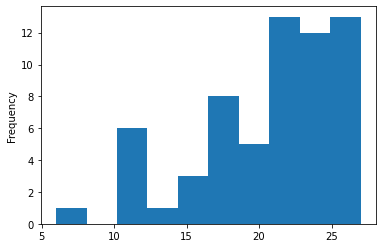

In [25]:
microexons["len"].plot.hist()

## EXERCISE 5 - GDP dataset

The analysis was prepared based on the World Bank Data, particularly the dataset [World Development Indicatiors](http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators) was utilized. This set contains many different economic development indicators you can choose from. For simplicity, we will use: GDP per capita (US\\$), GDP per capita growth (annual \%), GDP growth (annual \%), GDP (current US\\$).

**1. Load "GDP_last25years_08182020.csv" dataset. Missing data is written as "..", interpret it as NaN. Set the index of the DataFrame to "Series Name" and "Country Code" (multi-indexes are allowed in Pandas). Show the first five lines.**

In [59]:
gdp = pd.read_csv('data/GDP_last25years_08182020.csv', na_values="..", index_col= ["Series Name", "Country Name"])
gdp.head()

,,1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
Series Name,Country Name,,,,,,,,,,,,,,,,,,,,,
GDP per capita (current US$),China,6.096567e+02,7.094138e+02,7.817442e+02,8.285805e+02,8.732871e+02,9.593725e+02,1.053108e+03,1.148508e+03,1.288643e+03,1.508668e+03,...,4.550454e+03,5.618132e+03,6.316919e+03,7.050646e+03,7.678599e+03,8.066942e+03,8.147938e+03,8.879438e+03,9.976677e+03,1.026168e+04
GDP per capita growth (annual %),China,9.750279e+00,8.782185e+00,8.118548e+00,6.807806e+00,6.739270e+00,7.640002e+00,7.555802e+00,8.401915e+00,9.352364e+00,9.459175e+00,...,1.010310e+01,9.027256e+00,7.335380e+00,7.237863e+00,6.881995e+00,6.499317e+00,6.271729e+00,6.349910e+00,6.266042e+00,5.730121e+00
GDP growth (annual %),China,1.094923e+01,9.928372e+00,9.230769e+00,7.837614e+00,7.667486e+00,8.491508e+00,8.339911e+00,9.130646e+00,1.003560e+01,1.011122e+01,...,1.063614e+01,9.550914e+00,7.859627e+00,7.768615e+00,7.424524e+00,7.041856e+00,6.848728e+00,6.946200e+00,6.751614e+00,6.108561e+00
GDP (current US$),China,7.350000e+11,8.640000e+11,9.620000e+11,1.030000e+12,1.090000e+12,1.210000e+12,1.340000e+12,1.470000e+12,1.660000e+12,1.960000e+12,...,6.090000e+12,7.550000e+12,8.530000e+12,9.570000e+12,1.050000e+13,1.110000e+13,1.120000e+13,1.230000e+13,1.390000e+13,1.430000e+13
GDP per capita (current US$),European Union,1.946422e+04,1.974995e+04,1.808710e+04,1.861362e+04,1.847565e+04,1.690872e+04,1.718362e+04,1.868056e+04,2.292089e+04,2.626207e+04,...,3.293164e+04,3.571627e+04,3.315879e+04,3.456411e+04,3.524321e+04,3.047374e+04,3.116270e+04,3.302999e+04,3.565976e+04,3.484330e+04


**2. Note that column names are formated as "XXXX [YRXXXX]". Reformat it to XXXX.**

In [61]:
gdp.columns = [c[:4] for c in gdp.columns]
gdp.columns

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

**3. Print the GDP (current US\\$) of Spain.**

In [55]:
gdp.loc["GDP (current US$)","Spain"]

1995    6.150000e+11
1996    6.430000e+11
1997    5.900000e+11
1998    6.190000e+11
1999    6.350000e+11
2000    5.970000e+11
2001    6.270000e+11
2002    7.050000e+11
2003    9.050000e+11
2004    1.070000e+12
2005    1.150000e+12
2006    1.260000e+12
2007    1.470000e+12
2008    1.630000e+12
2009    1.490000e+12
2010    1.420000e+12
2011    1.480000e+12
2012    1.320000e+12
2013    1.350000e+12
2014    1.370000e+12
2015    1.200000e+12
2016    1.230000e+12
2017    1.310000e+12
2018    1.420000e+12
2019    1.390000e+12
Name: (GDP (current US$), Spain), dtype: float64

**4. Which country has the higuest GDP per capita in 2019?**

In [71]:
gdp.loc["GDP per capita (current US$)","2019"].sort_values(ascending=False)

Country Name
Switzerland       81993.72715
United States     65118.35833
Germany           46258.87829
United Kingdom    42300.26713
France            40493.92857
European Union    34843.29747
Italy             33189.56580
Spain             29613.67114
Portugal          23145.04082
China             10261.67913
Name: 2019, dtype: float64

**5. Make 4 plots: GDP per capita (US\\$), GDP per capita growth (annual \%), GDP growth (annual \%) and GDP (current US\\$) over the years. You will need to transpose the data with `T`,**

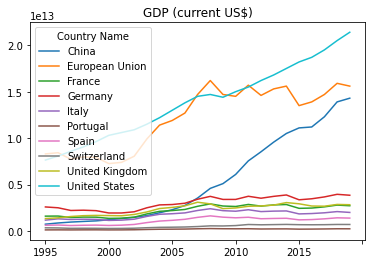

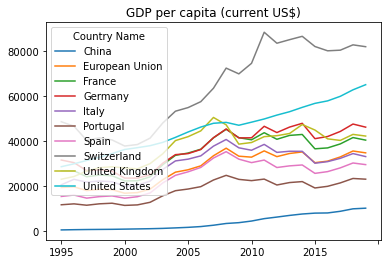

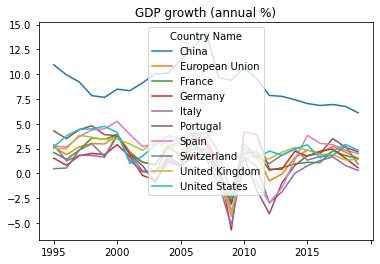

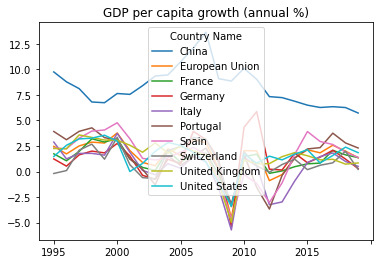

In [62]:
gdp.loc['GDP (current US$)'].T.plot(title="GDP (current US$)")
gdp.loc['GDP per capita (current US$)'].T.plot(title="GDP per capita (current US$)")
gdp.loc['GDP growth (annual %)'].T.plot(title="GDP growth (annual %)")
gdp.loc['GDP per capita growth (annual %)'].T.plot(title="GDP per capita growth (annual %)")

**6. To investigate whether different countries show the same trend over the years, make a correlation matrix of GDP per capita (current \\$US) using `corr()`.**

In [67]:
gdp.loc['GDP per capita (current US$)'].T.corr()

Country Name,China,European Union,France,Germany,Italy,Portugal,Spain,Switzerland,United Kingdom,United States
Country Name,,,,,,,,,,
China,1.000000,0.782970,0.720490,0.842436,0.593854,0.727711,0.647252,0.902293,0.641183,0.947970
European Union,0.782970,1.000000,0.993893,0.978332,0.961874,0.988499,0.973518,0.935713,0.902659,0.865432
France,0.720490,0.993893,1.000000,0.969152,0.977244,0.982879,0.977824,0.914836,0.896296,0.807521
Germany,0.842436,0.978332,0.969152,1.000000,0.898287,0.939951,0.909412,0.969990,0.833799,0.863324
Italy,0.593854,0.961874,0.977244,0.898287,1.000000,0.975717,0.990114,0.826050,0.912397,0.734254
Portugal,0.727711,0.988499,0.982879,0.939951,0.975717,1.000000,0.991938,0.882162,0.912868,0.848125
Spain,0.647252,0.973518,0.977824,0.909412,0.990114,0.991938,1.000000,0.840164,0.924557,0.792635
Switzerland,0.902293,0.935713,0.914836,0.969990,0.826050,0.882162,0.840164,1.000000,0.785463,0.891383
United Kingdom,0.641183,0.902659,0.896296,0.833799,0.912397,0.912868,0.924557,0.785463,1.000000,0.811382
